In [1]:
from iex import Stock
from iexfinance.stocks import Stock
import requests
import pandas as pd
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from datetime import datetime


import datetime,time

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'iexfinance'

In [323]:
# dateparse = lambda word : pd.datetime.strptime(word, '%Y-%m-%d')
#one = str(df.iloc[0]['Date'])[:-9]
strFormat="%Y-%m-%d"
#timeStamp =datetime.datetime.fromtimestamp(time.mktime(time.strptime(one,strFormat))).strftime("%d-%b-%Y")

#dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
#pd.datetime.strftime(datetime.strptime(word, '%Y-%m-%d'), '%d-%b-%Y')
#pd.datetime.strptime(first, '%Y-%m-%d')

df = pd.read_csv(os.path.join(os.getcwd(),"stocks_data","AAPL.csv"))

date_parser = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df['Date'] = df['Date'].map(date_parser)

In [329]:
# word = df.iloc[0]['Date']
# date_parser = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,79.167145,80.182854,79.142860,80.145714,67.919533,55771100
1,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
3,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
4,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300


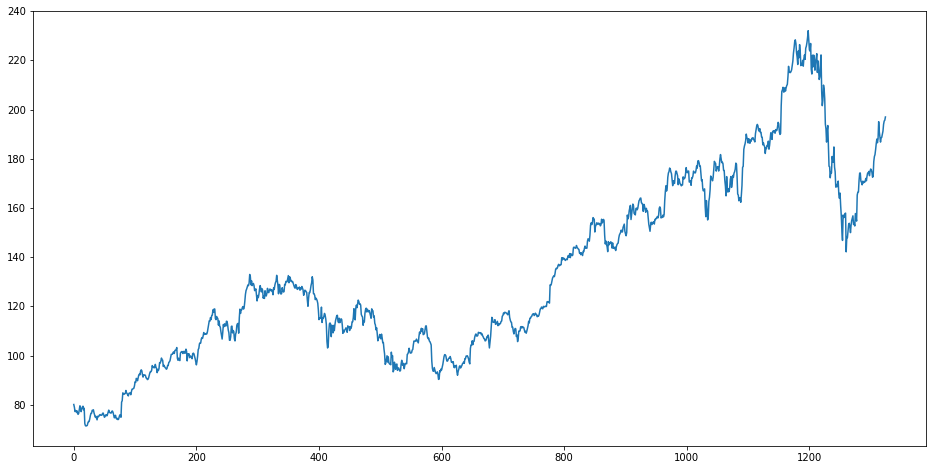

In [230]:
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m')
#df.index = df['Date']
df
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [233]:
temp = df.head()
temp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,79.167145,80.182854,79.142860,80.145714,67.919533,55771100
1,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
3,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
4,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300


In [203]:
json = df.to_json(orient='records')[1:-1].replace('},{', '} {')

In [204]:
first = temp.iloc[0:3]
first

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,79.167145,80.182854,79.142860,80.145714,67.919533,55771100
1,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
2,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900


In [205]:
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]
# #new_data.index = new_data.Date
# #new_data.drop('Date', axis=1, inplace=True)

In [206]:
cols_to_delete = ['Open','High','Low','Adj Close','Volume']

for col in cols_to_delete:
    del first[col]

In [218]:
labels = list(first['Date'])
values = list(first['Close'])

values

[80.145714, 79.01857, 77.28286]

# In one place


In [295]:
stock_name = "AAPL.csv"
strFormat="%Y-%m-%d"
dateparse = lambda word : datetime.datetime.fromtimestamp(time.mktime(time.strptime(str(word),strFormat))).strftime("%d-%b-%Y")
df = pd.read_csv(os.path.join(os.getcwd(),"stocks_data",stock_name),parse_dates=['Date'],date_parser=dateparse)

cols_to_delete = ['Open','High','Low','Adj Close','Volume']
for col in cols_to_delete:
    del df[col]

In [296]:
df.head()

,Date,Close
0,2013-12-31,80.145714
1,2014-01-02,79.018570
2,2014-01-03,77.282860
3,2014-01-06,77.704285
4,2014-01-07,77.148575


In [294]:
data = list(df['Close'])
len(data)

1325

# Do not modify Below this

In [39]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [40]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [41]:
print(new_data.head())
dataset = new_data.values

              Close
Date               
2013-12-31  80.1457
2014-01-02  79.0186
2014-01-03  77.2829
2014-01-06  77.7043
2014-01-07  77.1486


In [42]:
dataset.shape

(1325, 1)

In [31]:
scaled_data = scaler.fit_transform(dataset)

/home/sourabh/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
x_train, y_train = [], []
train_split = math.floor(0.75 * dataset.shape[0])

train = dataset[0:train_split,:]
valid = dataset[train_split:,:]

In [39]:
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

(933, 60)

In [43]:
x_train.shape

(933, 60, 1)

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


Epoch 1/1
 - 37s - loss: 0.0017


In [47]:

inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)



/home/sourabh/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [49]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

6.119715609924315

/home/sourabh/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


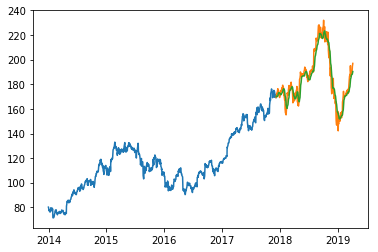

In [51]:
train = new_data[:train_split]
valid = new_data[train_split:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])